In [16]:
%pylab inline
import cv2
import sys
from ipywidgets import interact
rcParams['figure.figsize'] = (15.0,12.0)

def blur_edge(img, d= 31):
    h, w = img.shape[:2]
    img_pad = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_WRAP)
    img_blur = cv2.GaussianBlur(img_pad, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
    y,x = np.indices((h,w))
    dist = np.dstack([x, w-x-1, y, h-y-1]).min(-1)
    w = np.minimum(np.float32(dist)/d, 1.0)
    return img * w + img_blur * (1-w)

def motion_kernel(angle, d, sz=65):
    kern = np.ones((1,d), np.float32)
    c, s = np.cos(angle), np.sin(angle)
    A = np.float32([[c, -s, 0], [s, c, 0]])
    sz2 = sz // 2
    A[:,2] = (sz2, sz2) - np.dot(A[:,:2],((d-1)*0.5,0))
    kern = cv2.warpAffine(kern, A, (sz, sz), flags=cv2.INTER_CUBIC)
    
def update(angle, d, noise):
    noise = 10**(-0.1* noise)
    ang = deg2rad(angle)
    
    psf = motion_kernel(ang, d)
    
    psf /= psf.sum()
    psf_pad = np.zeros_like(img)
    kh, kw = psf.shape
    psf_pad[:kh, :kw] = psf
    PSF = cv2.dft(psf_pad, flags = cv2.DFT_COMPLEX_OUTPUT, nonzeroRows = kh)
    PSF2 = (PSF**2).sum(-1)
    iPSF = PSF / (PSF2 + noise)[...,np.newaxis]
    RES = cv2.mulSpectrums(IG, iPSF, 0)
    res = cv2.idft(RES, flags = cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
    res = np.roll(res, -kh//2, 0)
    res = np.roll(res, -kw//2, 1)
    
    subplot(1,2,1)
    imshow(psf,cmap='gray')
    subplot(1,2,2)
    imshow(res, cmap = 'gray')
    
fn = 'licenseplate_motion.jpg'

img = cv2.imread(fn, 0)
if img is None:
    print('failed to load img')
    
img = np.float32(img) / 255.0

img = blur_edge(img)
IMG = cv2.dft(img, flags = cv2.DFT_COMPLEX_OUTPUT)

interact(update, angle = (0.0,180,1), d= (0,50,1), noise=(0.0,50,1))
    


Populating the interactive namespace from numpy and matplotlib


interactive(children=(FloatSlider(value=90.0, description='angle', max=180.0, step=1.0), IntSlider(value=25, d…

<function __main__.update(angle, d, noise)>

<IPython.core.display.Javascript object>


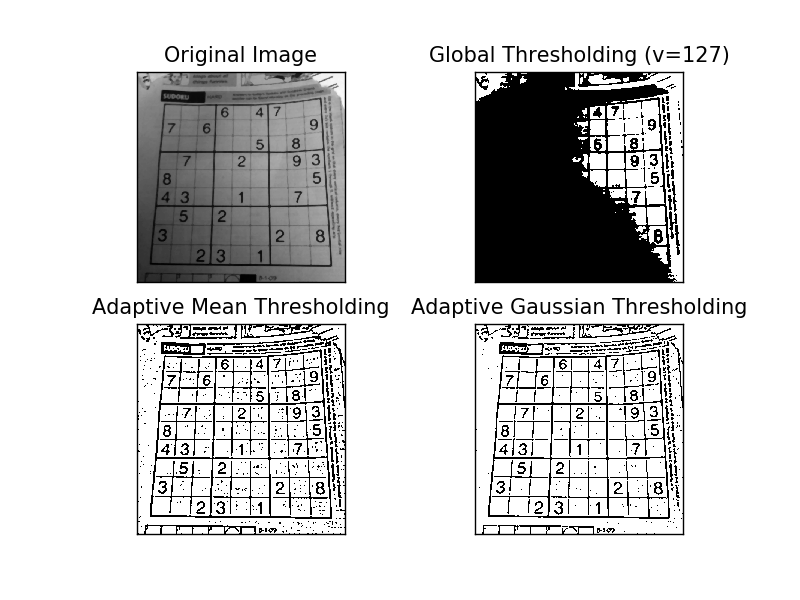

In [12]:
#compare hard thresholding to adaptive thresholding
img = cv2.imread('sudokubig.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles=['Original Image', 'Global Thresholding (v=127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

figure()
for i in range(4):
    subplot(2,2,i+1),plt.imshow(images[i],'gray')
    title(titles[i])
    xticks([]),yticks([])

In [8]:
yy=mgrid[-1:1:0.01,-1:1:0.01][0]
xx=yy.T
circ = 0*xx
circ[xx**2+yy**2 < 0.5**2] = 1
circ[xx**2+yy**2 < 0.2**2] = 0

kernel = ones((10,10),float32)

erosion = cv2.erode(circ, kernel,iterations=1)

dilation = cv2.dilate(circ, kernel,iterations=1)

#convert to 8 bit image and make a copy so that the original image is not modified
floodfilled = cv2.floodFill(image=circ.astype(np.uint8).copy(),mask=None,seedPoint=(100,100),newVal=1)

figure()
subplot(1,4,1)
imshow(circ,cmap='gray')
title('doughnut')
subplot(1,4,2)
imshow(erosion,cmap='gray')
title('eroded')
subplot(1,4,3)
imshow(dilation,cmap='gray')
title('dilated')
subplot(1,4,4)
imshow(floodfilled[1].astype(np.float32),cmap='gray')
title('flood-filled')

UsageError: Line magic function `%convert` not found.


<IPython.core.display.Javascript object>


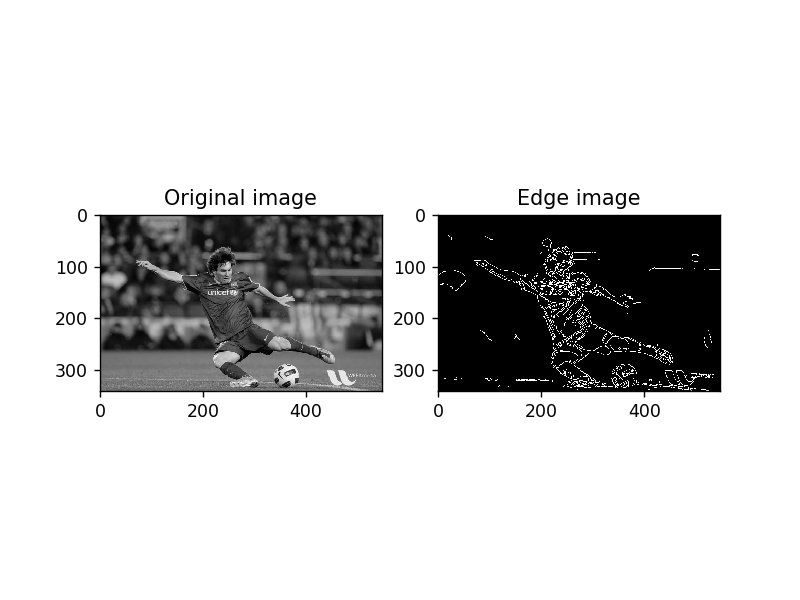

Text(0.5,1,'Edge image')

In [38]:
img=cv2.imread('messi5.jpg',0)
edge = cv2.Canny(img,100,200)
figure()
subplot(121),imshow(img,cmap='gray')
title('Original image')
subplot(122),imshow(edge,cmap='gray')
title('Edge image')

<IPython.core.display.Javascript object>


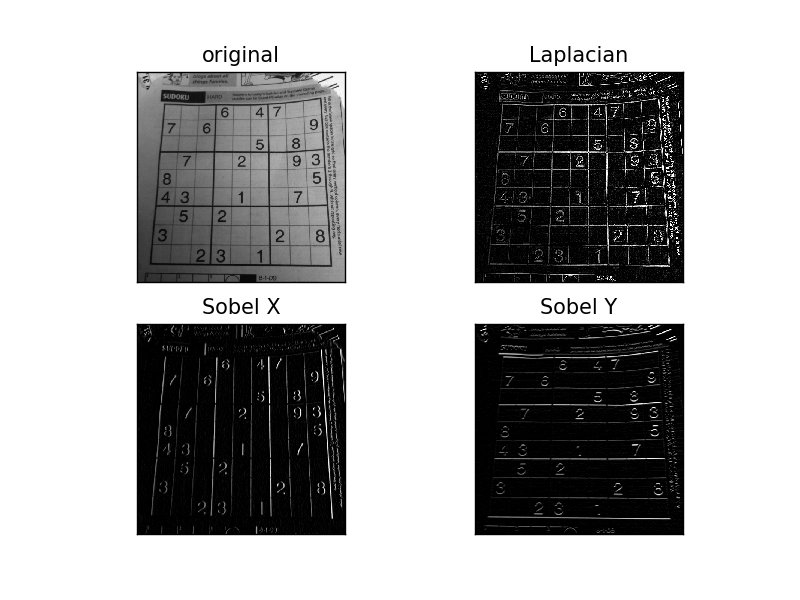

In [36]:
img = cv2.imread('sudokubig.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

figure()
subplot(2,2,1),imshow(img,cmap='gray')
title('original'),xticks([]),plt.yticks([])
subplot(2,2,2),imshow(laplacian,cmap='gray')
title('Laplacian'),xticks([]),plt.yticks([])
clim([0,45])
subplot(2,2,3),imshow(sobelx,cmap='gray')
title('Sobel X'), xticks([]), plt.yticks([])
clim([0,4500])
subplot(2,2,4),imshow(sobely,cmap='gray')
title('Sobel Y'),xticks([]),plt.yticks([])
clim([0,4500])

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


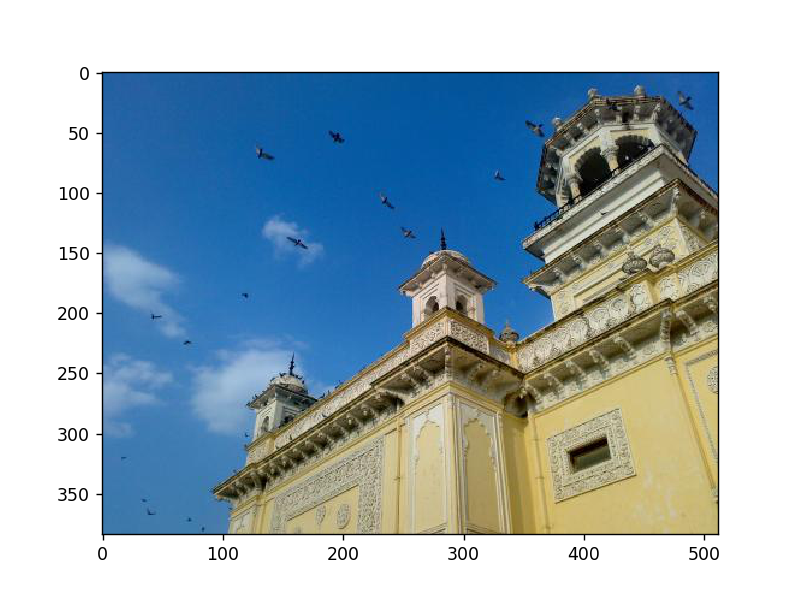

In [31]:
%pylab notebook
import numpy
import cv2
import matplotlib.pyplot as plt
im2disp=imread('home.jpg')
plt.figure()
imshow(im2disp)

<IPython.core.display.Javascript object>


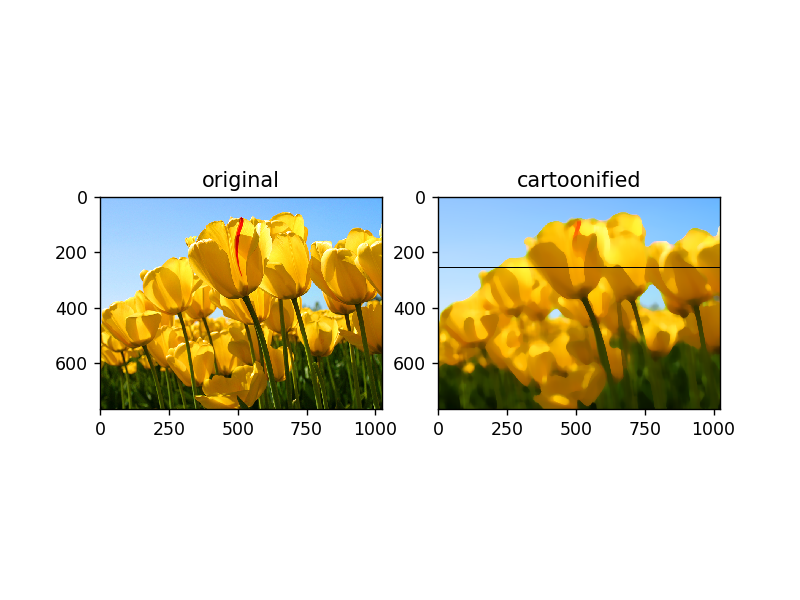

Text(0.5,1,'cartoonified')

In [34]:
tulips = imread('Tulips.jpg')
tublur = cv2.medianBlur(tulips,29)

edge=cv2.Canny(tublur,10,150)
kernel = np.ones((5,5),np.uint8)
edge=cv2.dilate(edge,kernel,iterations=1)
tublur[edge--255]=0

figure()
subplot(1,2,1)
imshow(tulips)
title('original')
subplot(1,2,2)
imshow(tublur)
title('cartoonified')

<IPython.core.display.Javascript object>


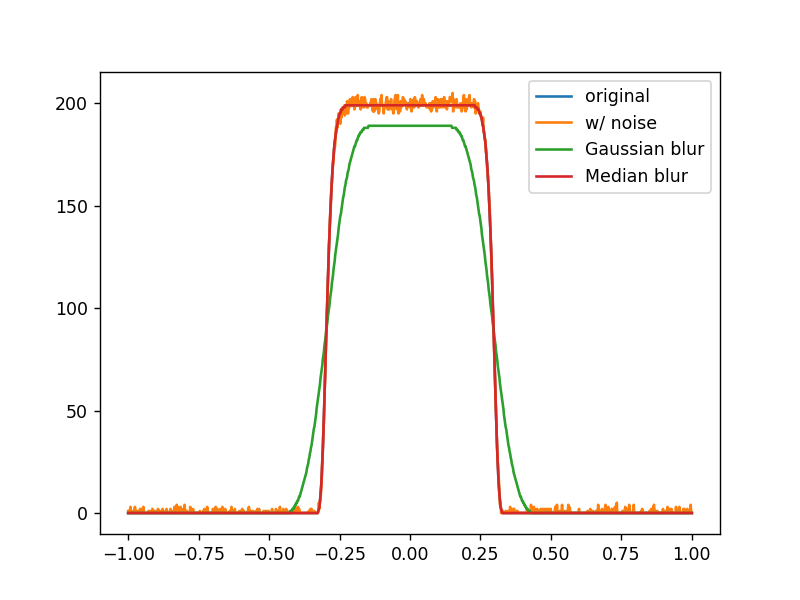

In [33]:
t=linspace(-1.0,1,1000)
y=200*(exp(-(t/0.3)**20))
yn=y+200*random.normal(scale=0.01,size=t.shape)
yn[yn<0]=0
y = y.astype(uint8)
yn = yn.astype(uint8)

figure()
plot(t,y)
plot(t,yn)

ygb = cv2.GaussianBlur(y,(199,199),0)
plot(t,ygb)

ymb = cv2.medianBlur(y,199)
plot(t,ymb)

legend(['original', 'w/ noise', 'Gaussian blur', 'Median blur'])


<IPython.core.display.Javascript object>


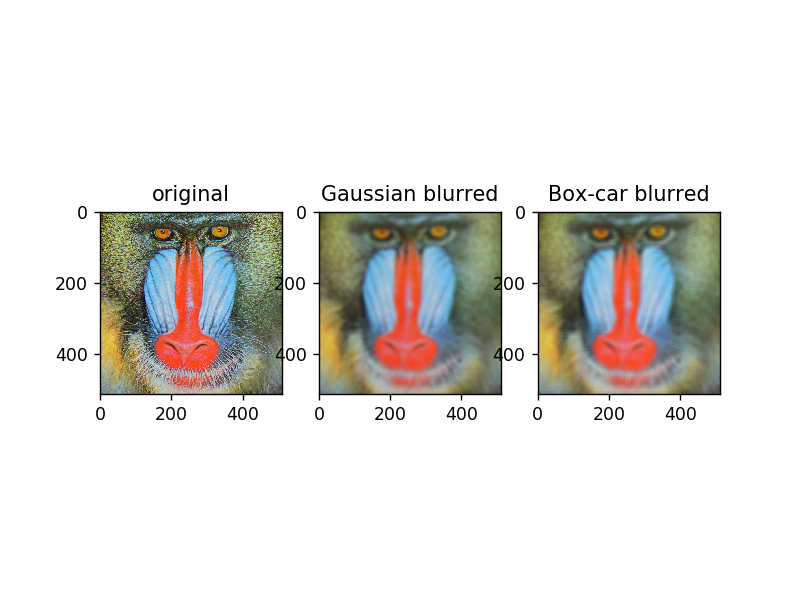

Text(0.5,1,'Box-car blurred')

In [30]:
baboon = imread('baboon.jpg')
babblur = cv2.GaussianBlur(baboon,(29,29),0)

kernel = np.ones((15,15),np.float32)
kernel /= kernel.size

babblur2 = cv2.filter2D(baboon,-1,kernel)

figure()
subplot(1,3,1)
imshow(baboon)
title('original')
subplot(1,3,2)
imshow(babblur)
title('Gaussian blurred')
subplot(1,3,3)
imshow(babblur2)
title('Box-car blurred')

<IPython.core.display.Javascript object>


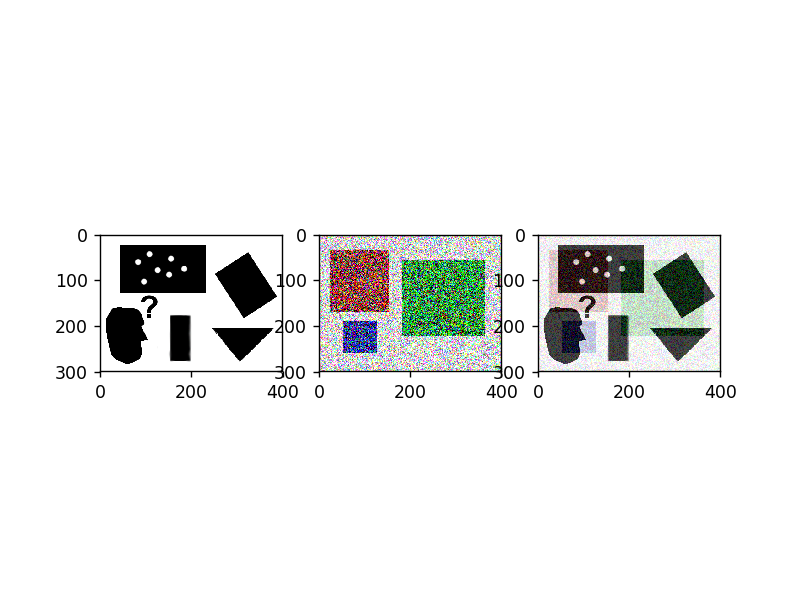

In [28]:
x = np.uint8([250])
y = np.uint8([10])
cv2.add(x,y)

img1 = imread('pic1.png')
img2 = imread('pic2.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

figure()
subplot(1,3,1)
imshow(img1)
subplot(1,3,2)
imshow(img2)
subplot(1,3,3)
imshow(dst)


In [2]:
%pylab notebook
import cv2
bfly = imread('butterfly.jpg')
figure()
imshow(bfly)
bflygray = cv2.cvtColor(bfly,cv2.COLOR_BGR2GRAY)
figure()
imshow(bflygray,cmap='gray')
colorbar()
print(bfly.shape)
print(bflygray.shape)
bfly.dtype
dflyfloat = bflygray.astype(double)/255.0
dflyfloat.dtype
height,width = bflygray.shape[0:2]
height, width
print(arange(5))
redc = bfly[:,:,0]
greenc=bfly[:,:,1]
bluec=bfly[:,:,2]
combined = zeros((height,width,3),uint8)
combined[:,:,0] = redc
combined[:,:,1] = greenc
combined[:,:,2] = bluec
figure()
imshow(combined)

bflyhead = bfly[70:100,210:250]
figure()
imshow(bflyhead)

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: 'butterfly.jpg'

In [33]:
cvim2disp = cv2.imread('home.jpg')
cv2.imshow('HelloWorld',cvim2disp)
cv2.waitKey()
cv2.destroyWindow('HelloWorld')